<a href="https://colab.research.google.com/github/MizuIkuri/UniversityProject/blob/main/WEN%20Stock%20Analysis_(10_Mei_2021_10_Mei_2022).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Data Saham

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import zscore
from scipy.stats import norm
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
wen_raw_data = pd.read_excel('WEN (10 May 2021 - 10 May 2022).xlsx')
wen_raw_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-05-10,22850000,23100000,22719999,22730000,22257824,7328200
1,2021-05-11,22620001,22940001,22180000,22799999,22326370,5246700
2,2021-05-12,24070000,24180000,22139999,22480000,22013018,8557200
3,2021-05-13,22920000,23000000,22420000,22510000,22042395,4248000
4,2021-05-14,22650000,23510000,22559999,23400000,22913908,3357600


In [ ]:
#Mengecek kelengkapan data
wen_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       253 non-null    datetime64[ns]
 1   Open       253 non-null    int64         
 2   High       253 non-null    int64         
 3   Low        253 non-null    int64         
 4   Close      253 non-null    int64         
 5   Adj Close  253 non-null    int64         
 6   Volume     253 non-null    int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 14.0 KB


#### Pergerakan Data Harga Saham Close

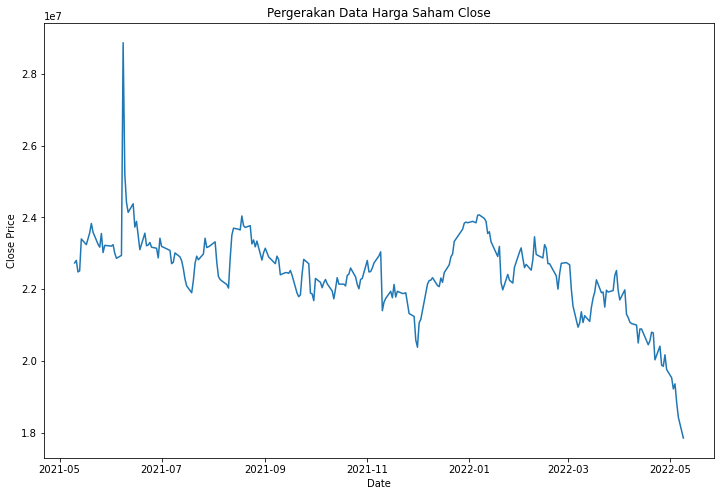

In [ ]:
plt.figure(figsize=(12,8))
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(wen_raw_data['Date'], wen_raw_data['Close'], label = 'Data Saham')
plt.title("Pergerakan Data Harga Saham Close")
plt.show()

## Log Return Saham

In [ ]:
#data kosong diawal data Log Return Saham, tidak termasuk dalam perhitungan GBM
log_return=[0]
a = 0
for i in range(1,len(wen_raw_data)):
    #perhitungan untuk menemukan log return saham dengan ln(S(t)/S(t-1))
    a = np.log(wen_raw_data['Close'][i]/wen_raw_data['Close'][i-1])
    #menambahkan ke dalam list yang telah dibentuk
    log_return.append(a)

In [ ]:
wen_raw_data['Log Return Saham'] = log_return
wen_raw_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Log Return Saham
0,2021-05-10,22850000,23100000,22719999,22730000,22257824,7328200,0.000000
1,2021-05-11,22620001,22940001,22180000,22799999,22326370,5246700,0.003075
2,2021-05-12,24070000,24180000,22139999,22480000,22013018,8557200,-0.014134
3,2021-05-13,22920000,23000000,22420000,22510000,22042395,4248000,0.001334
4,2021-05-14,22650000,23510000,22559999,23400000,22913908,3357600,0.038776


In [ ]:
wen = wen_raw_data[1:253]
wen.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Log Return Saham
1,2021-05-11,22620001,22940001,22180000,22799999,22326370,5246700,0.003075
2,2021-05-12,24070000,24180000,22139999,22480000,22013018,8557200,-0.014134
3,2021-05-13,22920000,23000000,22420000,22510000,22042395,4248000,0.001334
4,2021-05-14,22650000,23510000,22559999,23400000,22913908,3357600,0.038776
5,2021-05-17,23299999,23500000,23010000,23240000,22757231,4042600,-0.006861


#### Pergerakan Log Return Saham

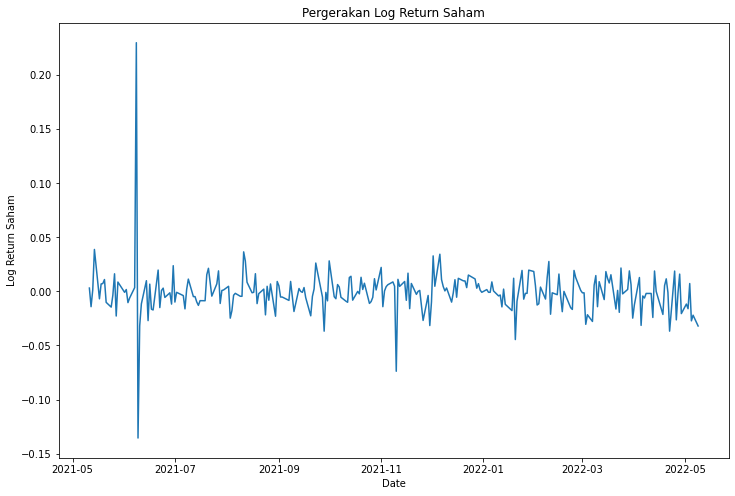

In [ ]:
plt.figure(figsize=(12,8))
plt.xlabel('Date')
plt.ylabel('Log Return Saham')
plt.plot(wen['Date'], wen['Log Return Saham'], label = 'Data Saham')
plt.title("Pergerakan Log Return Saham")
plt.show()

## Mean dan Variance Saham

In [ ]:
daily_mu_saham = np.mean(wen_raw_data['Close'] )
daily_mu_saham

22439327.972332016

In [ ]:
daily_variance_saham = np.var(wen_raw_data['Close'] )
daily_variance_saham

1301729552252.7695

In [ ]:
Annualized_mu_saham = daily_mu_saham*253
Annualized_mu_saham

5677149977.0

In [ ]:
Annualized_variance_saham = daily_variance_saham*253
Annualized_variance_saham

329337576719950.7

In [ ]:
sigma_daily_saham = (Annualized_variance_saham*(1/253))**(1/2)
sigma_daily_saham

1140933.631835248

## Mean dan Variance Return

In [ ]:
daily_mu = np.mean(wen['Log Return Saham'] )
daily_mu

-0.0009590560699952541

In [ ]:
daily_variance = np.var(wen['Log Return Saham'] )
daily_variance

0.0004985692201643239

In [ ]:
Annualized_mu = daily_mu*253
Annualized_mu

-0.24264118570879928

In [ ]:
Annualized_variance = daily_variance*253
Annualized_variance

0.12613801270157393

In [ ]:
Annualized_sigma = (Annualized_variance)**(1/2)
Annualized_sigma

0.3551591371506214

## BROWNIAN MOTION WITH DRIFT SIMULATION

In [ ]:
n_daily = 253
n_weekly = 52
T = 1
dt = T/n_daily
X0 = wen['Log Return Saham'][1]
S0 = wen['Close'][252]
sigma_daily = (Annualized_variance*(1/253))**(1/2)
mu_daily = Annualized_mu*(1/253)
sigma_weekly = (Annualized_variance*(1/52))**(1/2)
mu_weekly = Annualized_mu*(1/52)
M = 1

In [ ]:
def BrownianMotionWithDrift():
    times = np.linspace(0.0, T, n_daily-1)
    #B(2)-B(1) ~ Normal Distribusi dengan mean dan Varians dari perhitungan log return
    d0 = np.random.normal(mu_daily, sigma_daily, size = (n_daily-2,))
    # mengkalkulasi the brownian motion
    B = np.cumsum(d0)
    #memasukkkan nilai log return awal untuk setiap normal distribusi
    B = B + X0
    # memasukkan X0 dimulai dari log return awal
    B = np.insert(B, 0, X0)
    return times, B

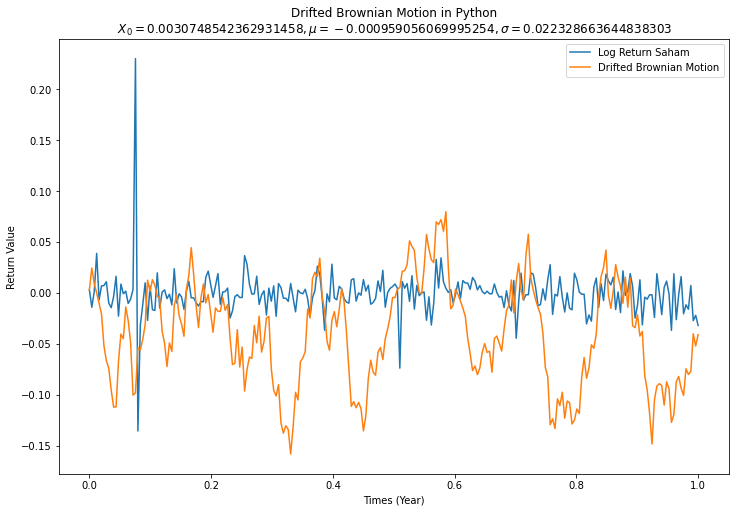

In [ ]:
times, X = BrownianMotionWithDrift()
plt.figure(figsize=(12,8))
plt.title("Drifted Brownian Motion in Python\n $X_0 = {0}, \mu = {1}, \sigma = {2}$".format(X0, mu_daily, sigma_daily))
plt.plot(times, wen['Log Return Saham'], label = 'Log Return Saham')
plt.plot(times, X, label = 'Drifted Brownian Motion')
plt.legend(loc = 'best')
plt.xlabel('Times (Year)')
plt.ylabel('Return Value')
plt.show()

## GEOMETRIC BROWNIAN MOTION

In [ ]:
def GBM_Daily():
    #melakukan simulasi dengan rumus e^(rand.N (μ ∆t,σ ∆t) )
    St = np.exp(np.random.normal(mu_daily,sigma_daily, size=(M,n_daily-1)).T)
    #termasuk array 1's
    St = np.vstack([np.ones(M), St])
    #mengalikan dengan S0 dan mengembalikan produk kumulatif elemen di sepanjang jalur simulasi yang diinginkan
    St = S0 * St.cumprod(axis=0)
    #untuk mendefinisikan time interval
    time = np.linspace(0.0,T,n_daily)
    #Membentuk array numpy yang bentuknya sama dengan St untuk simulasi
    t = np.full(shape=(M,n_daily), fill_value=time).T
    return t,St

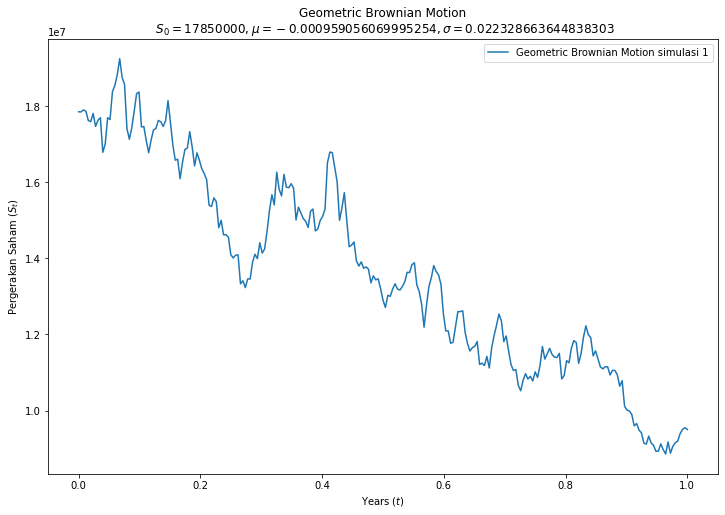

In [ ]:
t,St = GBM_Daily()
plt.figure(figsize=(12,8))
plt.plot(t, St, label = 'Geometric Brownian Motion simulasi 1')
plt.legend(loc = 'best')
plt.xlabel("Years $(t)$")
plt.ylabel("Pergerakan Saham $(S_t)$")
plt.title("Geometric Brownian Motion\n $S_0 = {0}, \mu = {1}, \sigma = {2}$".format(S0, mu_daily, sigma_daily))
plt.show()

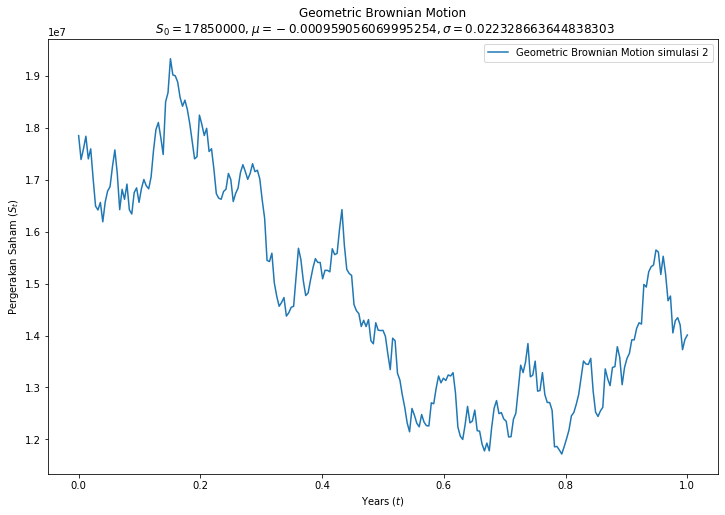

In [ ]:
t,St = GBM_Daily()
plt.figure(figsize=(12,8))
plt.plot(t, St, label = 'Geometric Brownian Motion simulasi 2')
plt.legend(loc = 'best')
plt.xlabel("Years $(t)$")
plt.ylabel("Pergerakan Saham $(S_t)$")
plt.title("Geometric Brownian Motion\n $S_0 = {0}, \mu = {1}, \sigma = {2}$".format(S0, mu_daily, sigma_daily))
plt.show()

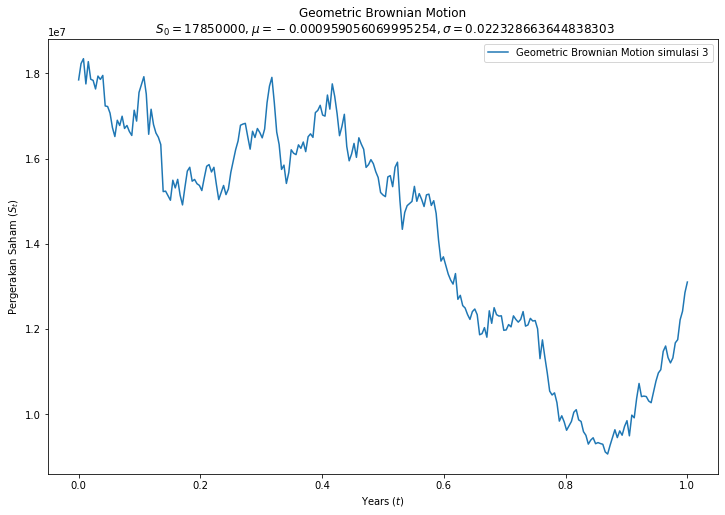

In [ ]:
t,St = GBM_Daily()
plt.figure(figsize=(12,8))
plt.plot(t, St, label = 'Geometric Brownian Motion simulasi 3')
plt.legend(loc = 'best')
plt.xlabel("Years $(t)$")
plt.ylabel("Pergerakan Saham $(S_t)$")
plt.title("Geometric Brownian Motion\n $S_0 = {0}, \mu = {1}, \sigma = {2}$".format(S0, mu_daily, sigma_daily))
plt.show()

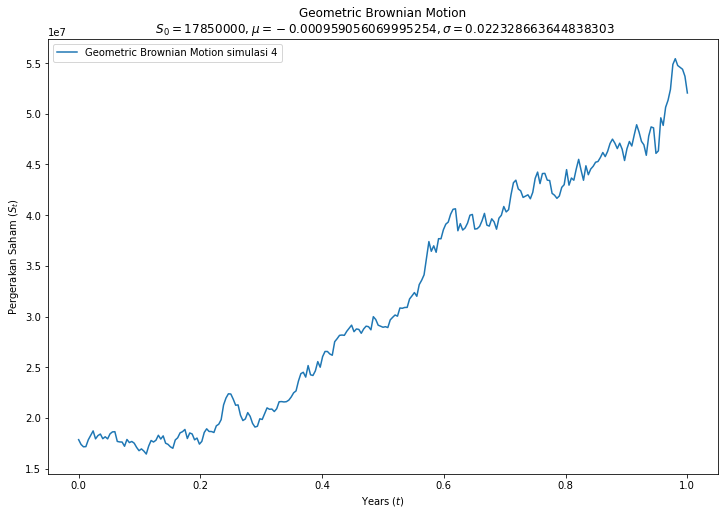

In [ ]:
t,St = GBM_Daily()
plt.figure(figsize=(12,8))
plt.plot(t, St, label = 'Geometric Brownian Motion simulasi 4')
plt.legend(loc = 'best')
plt.xlabel("Years $(t)$")
plt.ylabel("Pergerakan Saham $(S_t)$")
plt.title("Geometric Brownian Motion\n $S_0 = {0}, \mu = {1}, \sigma = {2}$".format(S0, mu_daily, sigma_daily))
plt.show()

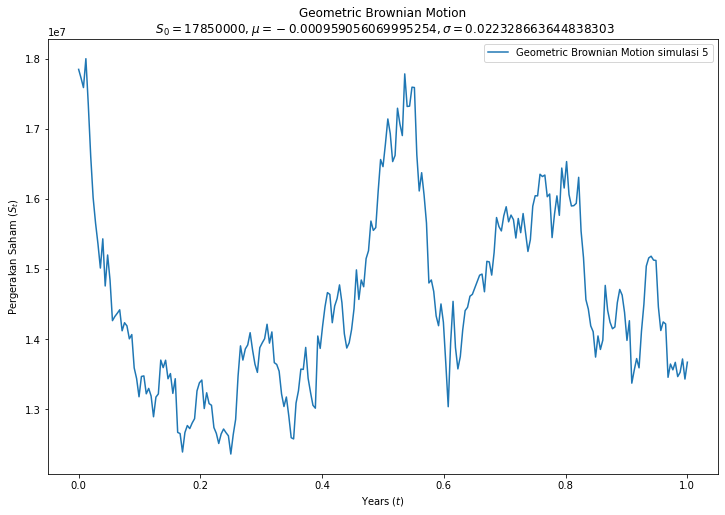

In [ ]:
t,St = GBM_Daily()
plt.figure(figsize=(12,8))
plt.plot(t, St, label = 'Geometric Brownian Motion simulasi 5')
plt.legend(loc = 'best')
plt.xlabel("Years $(t)$")
plt.ylabel("Pergerakan Saham $(S_t)$")
plt.title("Geometric Brownian Motion\n $S_0 = {0}, \mu = {1}, \sigma = {2}$".format(S0, mu_daily, sigma_daily))
plt.show()

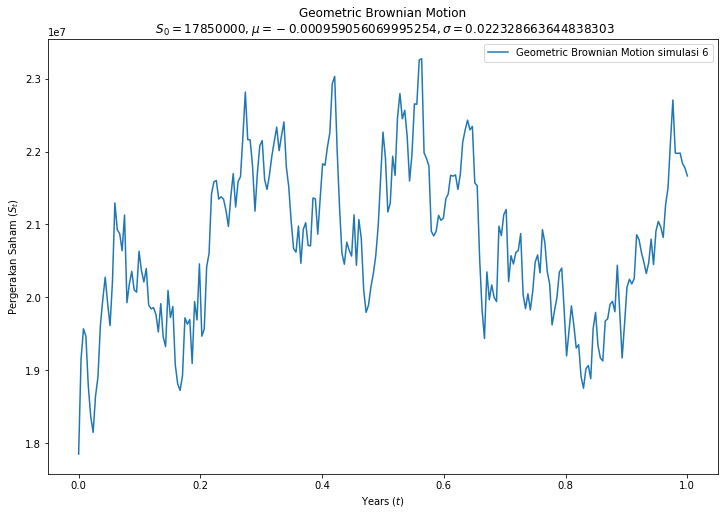

In [ ]:
t,St = GBM_Daily()
plt.figure(figsize=(12,8))
plt.plot(t, St, label = 'Geometric Brownian Motion simulasi 6')
plt.legend(loc = 'best')
plt.xlabel("Years $(t)$")
plt.ylabel("Pergerakan Saham $(S_t)$")
plt.title("Geometric Brownian Motion\n $S_0 = {0}, \mu = {1}, \sigma = {2}$".format(S0, mu_daily, sigma_daily))
plt.show()

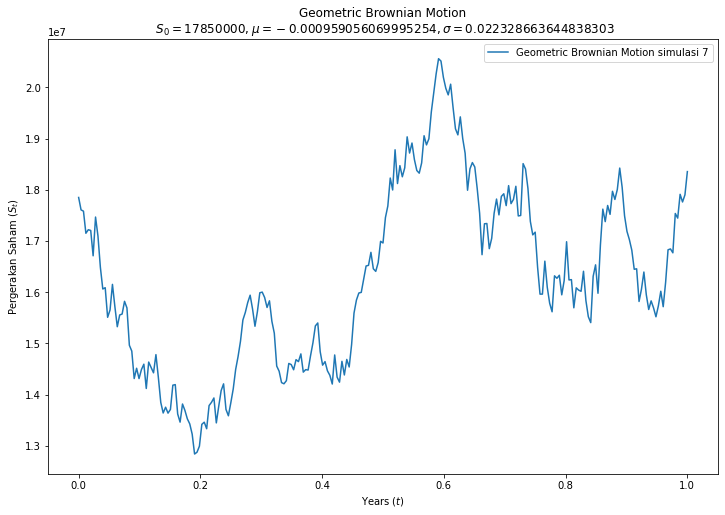

In [ ]:
t,St = GBM_Daily()
plt.figure(figsize=(12,8))
plt.plot(t, St, label = 'Geometric Brownian Motion simulasi 7')
plt.legend(loc = 'best')
plt.xlabel("Years $(t)$")
plt.ylabel("Pergerakan Saham $(S_t)$")
plt.title("Geometric Brownian Motion\n $S_0 = {0}, \mu = {1}, \sigma = {2}$".format(S0, mu_daily, sigma_daily))
plt.show()

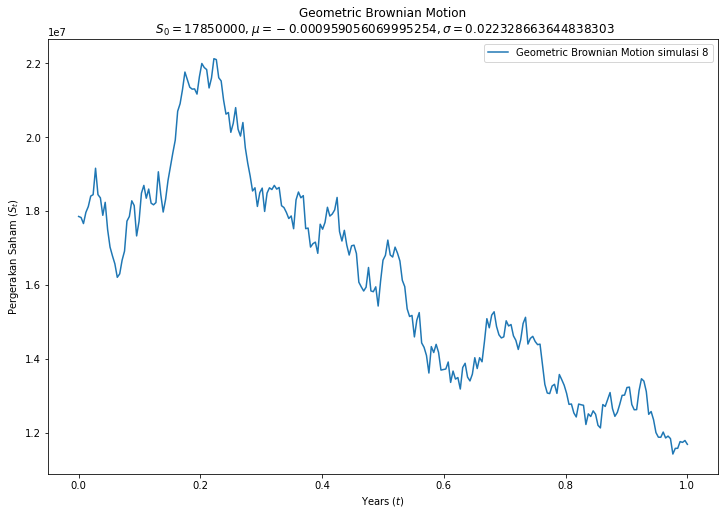

In [ ]:
t,St = GBM_Daily()
plt.figure(figsize=(12,8))
plt.plot(t, St, label = 'Geometric Brownian Motion simulasi 8')
plt.legend(loc = 'best')
plt.xlabel("Years $(t)$")
plt.ylabel("Pergerakan Saham $(S_t)$")
plt.title("Geometric Brownian Motion\n $S_0 = {0}, \mu = {1}, \sigma = {2}$".format(S0, mu_daily, sigma_daily))
plt.show()

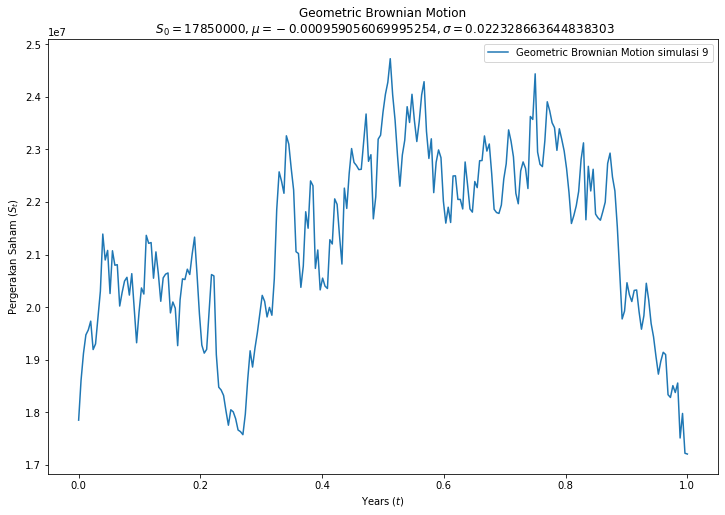

In [ ]:
t,St = GBM_Daily()
plt.figure(figsize=(12,8))
plt.plot(t, St, label = 'Geometric Brownian Motion simulasi 9')
plt.legend(loc = 'best')
plt.xlabel("Years $(t)$")
plt.ylabel("Pergerakan Saham $(S_t)$")
plt.title("Geometric Brownian Motion\n $S_0 = {0}, \mu = {1}, \sigma = {2}$".format(S0, mu_daily, sigma_daily))
plt.show()

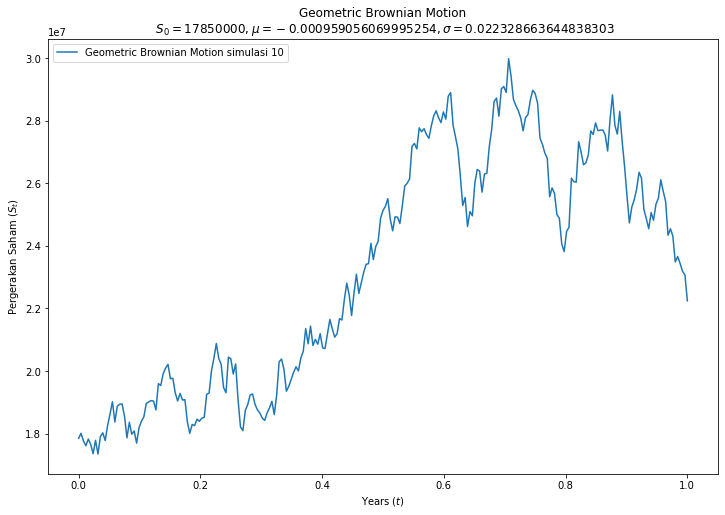

In [ ]:
t,St = GBM_Daily()
plt.figure(figsize=(12,8))
plt.plot(t, St, label = 'Geometric Brownian Motion simulasi 10')
plt.legend(loc = 'best')
plt.xlabel("Years $(t)$")
plt.ylabel("Pergerakan Saham $(S_t)$")
plt.title("Geometric Brownian Motion\n $S_0 = {0}, \mu = {1}, \sigma = {2}$".format(S0, mu_daily, sigma_daily))
plt.show()

In [ ]:
def GBM_Daily_10simulation():
    #melakukan simulasi dengan rumus e^(rand.N (μ ∆t,σ ∆t) )
    St = np.exp(np.random.normal(mu_daily,sigma_daily, size=(10,n_daily-1)).T)
    #termasuk array 1's
    St = np.vstack([np.ones(10), St])
    #mengalikan dengan S0 dan mengembalikan produk kumulatif elemen di sepanjang jalur simulasi yang diinginkan
    St = S0 * St.cumprod(axis=0)
    #untuk mendefinisikan time interval
    time = np.linspace(0.0,T,n_daily)
    #Membentuk array numpy yang bentuknya sama dengan St untuk simulasi
    t = np.full(shape=(10,n_daily), fill_value=time).T
    return t,St

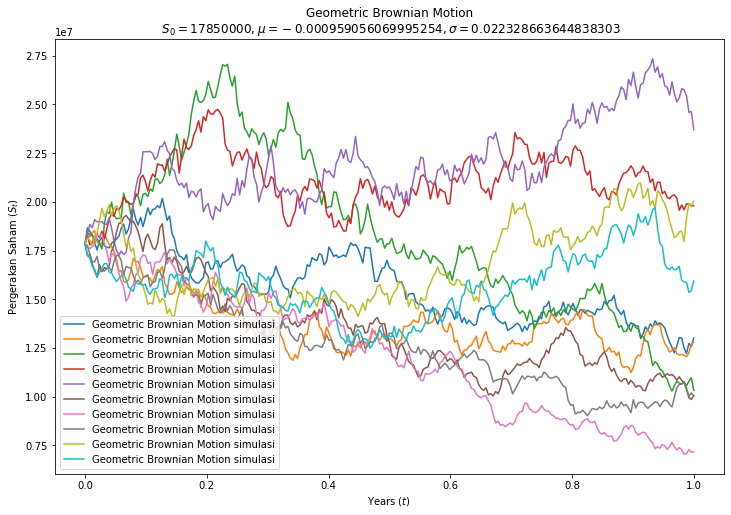

In [ ]:
t,St = GBM_Daily_10simulation()
plt.figure(figsize=(12,8))
plt.plot(t, St, label = 'Geometric Brownian Motion simulasi')
plt.legend(loc = 'best')
plt.xlabel("Years $(t)$")
plt.ylabel("Pergerakan Saham $(S_t)$")
plt.title("Geometric Brownian Motion\n $S_0 = {0}, \mu = {1}, \sigma = {2}$".format(S0, mu_daily, sigma_daily))
plt.show()

In [ ]:
def GBM_Weekly():
    #melakukan simulasi dengan rumus e^(rand.N (μ ∆t,σ ∆t) )
    St = np.exp(np.random.normal(mu_weekly ,sigma_weekly , size=(M,n_weekly-1)).T)
    #termasuk array 1's
    St = np.vstack([np.ones(M), St])
    #mengalikan dengan S0 dan mengembalikan produk kumulatif elemen di sepanjang jalur simulasi yang diinginkan
    St = S0 * St.cumprod(axis=0)
    #untuk mendefinisikan time interval
    time = np.linspace(0.0,T,n_weekly)
    #Membentuk array numpy yang bentuknya sama dengan St untuk simulasi
    t = np.full(shape=(M,n_weekly), fill_value=time).T
    return t,St

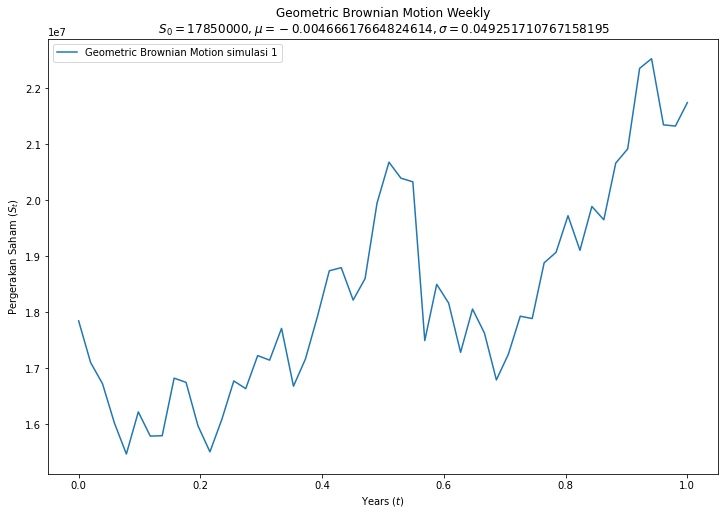

In [ ]:
t,St = GBM_Weekly()
plt.figure(figsize=(12,8))
plt.plot(t, St, label = 'Geometric Brownian Motion simulasi 1')
plt.legend(loc = 'best')
plt.xlabel("Years $(t)$")
plt.ylabel("Pergerakan Saham $(S_t)$")
plt.title("Geometric Brownian Motion Weekly\n $S_0 = {0}, \mu = {1}, \sigma = {2}$".format(S0, mu_weekly, sigma_weekly))
plt.show()

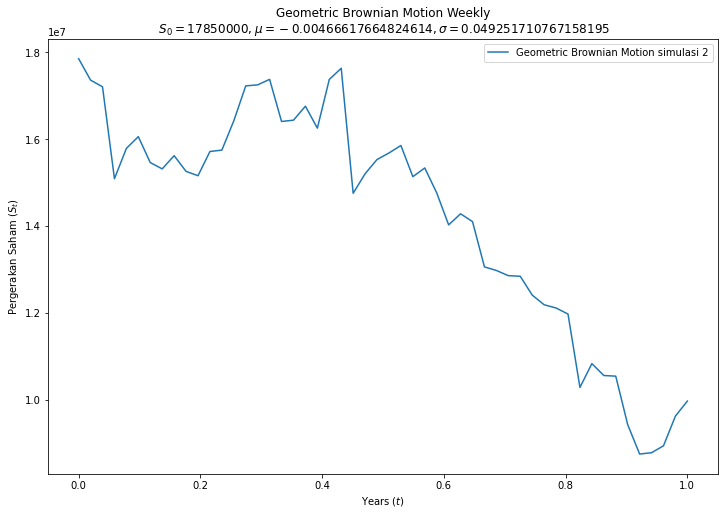

In [ ]:
t,St = GBM_Weekly()
plt.figure(figsize=(12,8))
plt.plot(t, St, label = 'Geometric Brownian Motion simulasi 2')
plt.legend(loc = 'best')
plt.xlabel("Years $(t)$")
plt.ylabel("Pergerakan Saham $(S_t)$")
plt.title("Geometric Brownian Motion Weekly\n $S_0 = {0}, \mu = {1}, \sigma = {2}$".format(S0, mu_weekly, sigma_weekly))
plt.show()

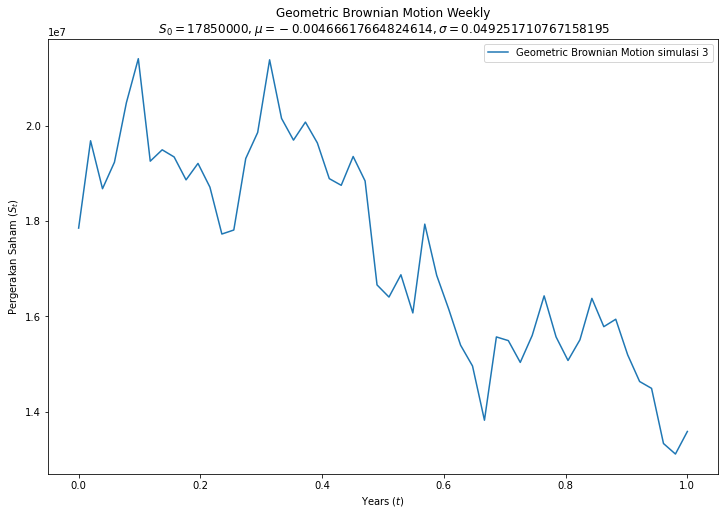

In [ ]:
t,St = GBM_Weekly()
plt.figure(figsize=(12,8))
plt.plot(t, St, label = 'Geometric Brownian Motion simulasi 3')
plt.legend(loc = 'best')
plt.xlabel("Years $(t)$")
plt.ylabel("Pergerakan Saham $(S_t)$")
plt.title("Geometric Brownian Motion Weekly\n $S_0 = {0}, \mu = {1}, \sigma = {2}$".format(S0, mu_weekly, sigma_weekly))
plt.show()

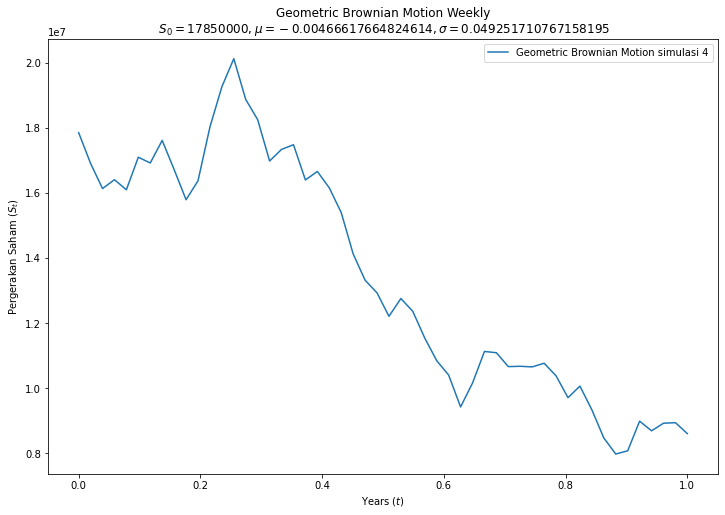

In [ ]:
t,St = GBM_Weekly()
plt.figure(figsize=(12,8))
plt.plot(t, St, label = 'Geometric Brownian Motion simulasi 4')
plt.legend(loc = 'best')
plt.xlabel("Years $(t)$")
plt.ylabel("Pergerakan Saham $(S_t)$")
plt.title("Geometric Brownian Motion Weekly\n $S_0 = {0}, \mu = {1}, \sigma = {2}$".format(S0, mu_weekly, sigma_weekly))
plt.show()

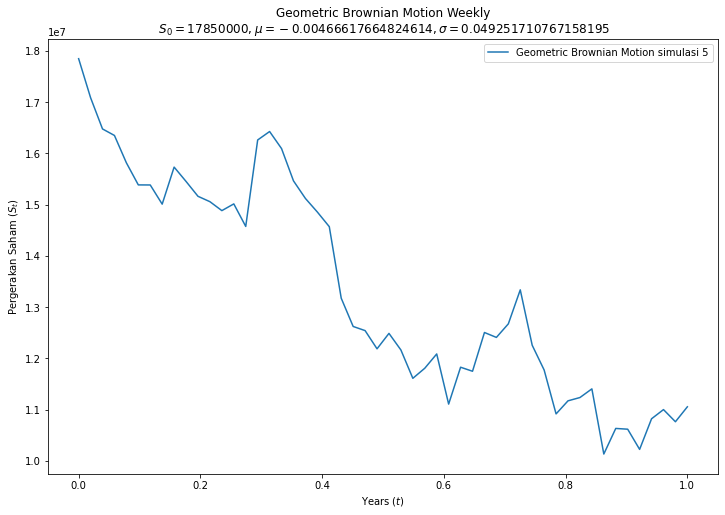

In [ ]:
t,St = GBM_Weekly()
plt.figure(figsize=(12,8))
plt.plot(t, St, label = 'Geometric Brownian Motion simulasi 5')
plt.legend(loc = 'best')
plt.xlabel("Years $(t)$")
plt.ylabel("Pergerakan Saham $(S_t)$")
plt.title("Geometric Brownian Motion Weekly\n $S_0 = {0}, \mu = {1}, \sigma = {2}$".format(S0, mu_weekly, sigma_weekly))
plt.show()

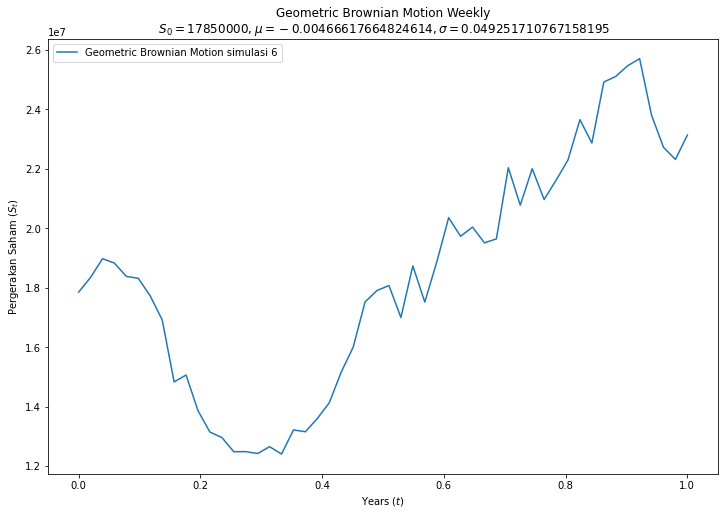

In [ ]:
t,St = GBM_Weekly()
plt.figure(figsize=(12,8))
plt.plot(t, St, label = 'Geometric Brownian Motion simulasi 6')
plt.legend(loc = 'best')
plt.xlabel("Years $(t)$")
plt.ylabel("Pergerakan Saham $(S_t)$")
plt.title("Geometric Brownian Motion Weekly\n $S_0 = {0}, \mu = {1}, \sigma = {2}$".format(S0, mu_weekly, sigma_weekly))
plt.show()

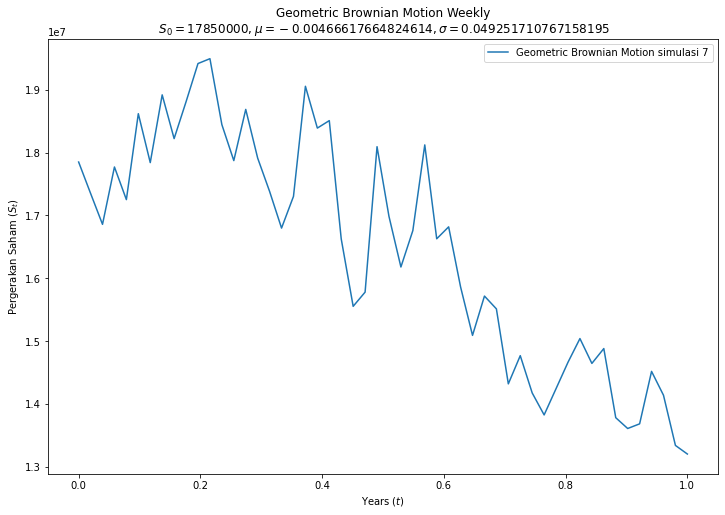

In [ ]:
t,St = GBM_Weekly()
plt.figure(figsize=(12,8))
plt.plot(t, St, label = 'Geometric Brownian Motion simulasi 7')
plt.legend(loc = 'best')
plt.xlabel("Years $(t)$")
plt.ylabel("Pergerakan Saham $(S_t)$")
plt.title("Geometric Brownian Motion Weekly\n $S_0 = {0}, \mu = {1}, \sigma = {2}$".format(S0, mu_weekly, sigma_weekly))
plt.show()

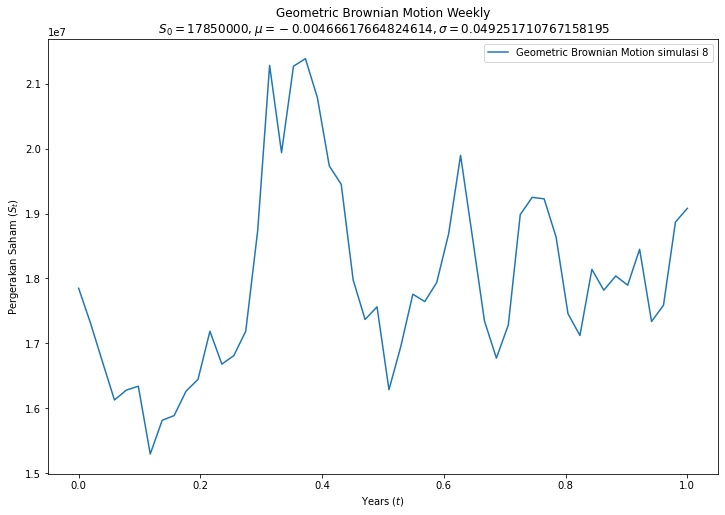

In [ ]:
t,St = GBM_Weekly()
plt.figure(figsize=(12,8))
plt.plot(t, St, label = 'Geometric Brownian Motion simulasi 8')
plt.legend(loc = 'best')
plt.xlabel("Years $(t)$")
plt.ylabel("Pergerakan Saham $(S_t)$")
plt.title("Geometric Brownian Motion Weekly\n $S_0 = {0}, \mu = {1}, \sigma = {2}$".format(S0, mu_weekly, sigma_weekly))
plt.show()

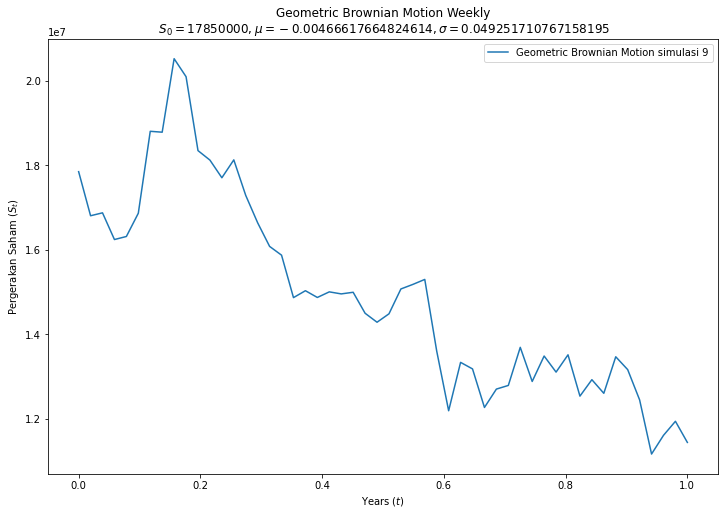

In [ ]:
t,St = GBM_Weekly()
plt.figure(figsize=(12,8))
plt.plot(t, St, label = 'Geometric Brownian Motion simulasi 9')
plt.legend(loc = 'best')
plt.xlabel("Years $(t)$")
plt.ylabel("Pergerakan Saham $(S_t)$")
plt.title("Geometric Brownian Motion Weekly\n $S_0 = {0}, \mu = {1}, \sigma = {2}$".format(S0, mu_weekly, sigma_weekly))
plt.show()

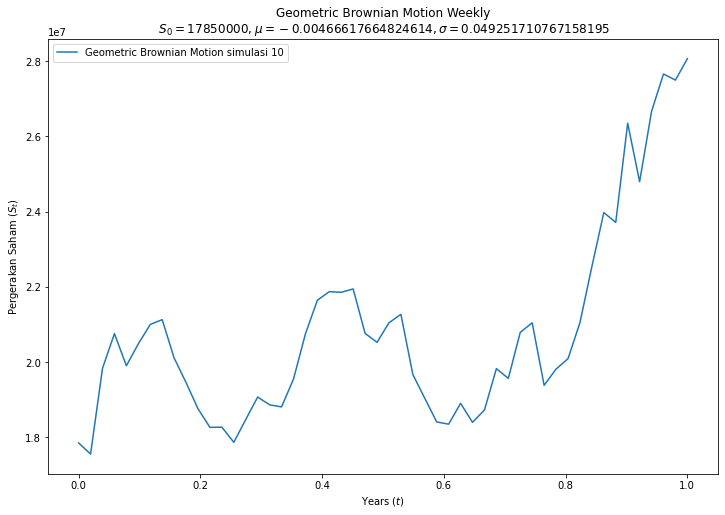

In [ ]:
t,St = GBM_Weekly()
plt.figure(figsize=(12,8))
plt.plot(t, St, label = 'Geometric Brownian Motion simulasi 10')
plt.legend(loc = 'best')
plt.xlabel("Years $(t)$")
plt.ylabel("Pergerakan Saham $(S_t)$")
plt.title("Geometric Brownian Motion Weekly\n $S_0 = {0}, \mu = {1}, \sigma = {2}$".format(S0, mu_weekly, sigma_weekly))
plt.show()

In [ ]:
def GBM_Weekly_10simulation():
    #melakukan simulasi dengan rumus e^(rand.N (μ ∆t,σ ∆t) )
    St = np.exp(np.random.normal(mu_weekly ,sigma_weekly , size=(10,n_weekly-1)).T)
    #termasuk array 1's
    St = np.vstack([np.ones(10), St])
    #mengalikan dengan S0 dan mengembalikan produk kumulatif elemen di sepanjang jalur simulasi yang diinginkan
    St = S0 * St.cumprod(axis=0)
    #untuk mendefinisikan time interval
    time = np.linspace(0.0,T,n_weekly)
    #Membentuk array numpy yang bentuknya sama dengan St untuk simulasi
    t = np.full(shape=(10,n_weekly), fill_value=time).T
    return t,St

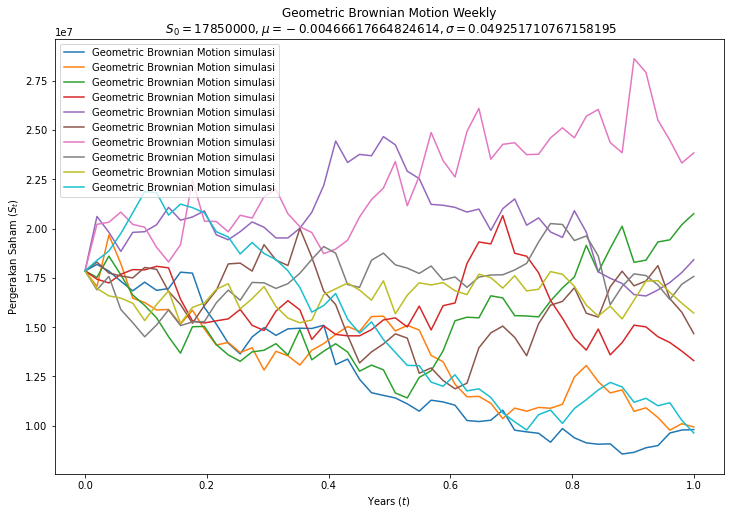

In [ ]:
t,St = GBM_Weekly_10simulation()
plt.figure(figsize=(12,8))
plt.plot(t, St, label = 'Geometric Brownian Motion simulasi')
plt.legend(loc = 'best')
plt.xlabel("Years $(t)$")
plt.ylabel("Pergerakan Saham $(S_t)$")
plt.title("Geometric Brownian Motion Weekly\n $S_0 = {0}, \mu = {1}, \sigma = {2}$".format(S0, mu_weekly, sigma_weekly))
plt.show()

## Black Scholes

In [ ]:
#Closed_price 10 May 2022
S = wen['Close'][252]
#r = 0.75%
r= 0.0075
#t = 20 May 2022 (8 hari dari 10 May 2022 (sabtu minggu tidak dihitung)) -> Hari kedaluwarsa sehingga t = 8/253.
Days_to_expiration = 8
t = Days_to_expiration/n_daily
#  Strike Price
K_call = 17000000
K_put = 18000000
#  Harga asumsi premi call dan put price dari data.
Premi_call = 1350000
Premi_put = 700000

In [ ]:
#  Fungsi utilitas untuk menghitung nilai d1 dan d2 yang dibutuhkan.
def d_call():
    d1_call = (np.log(S/K_call)+(r+sigma_daily**2/2.)*t)/(sigma_daily*np.sqrt(t))
    d2_call = d1_call-sigma_daily*np.sqrt(t)
    return d1_call, d2_call
def d_put():
    d1_put = (np.log(S/K_put)+(r+sigma_daily**2/2.)*t)/(sigma_daily*np.sqrt(t))
    d2_put = d1_put-sigma_daily*np.sqrt(t)
    return d1_put, d2_put
#  Black-Scholes formulas untuk harga call dan put.
def call_price():
    C = S*norm.cdf(d1_call) - K_call*np.exp(-r * t)*norm.cdf(d2_call)
    return C

def put_price():
    P = -S*norm.cdf(-d1_put) +  K_put*np.exp(-r * t)*norm.cdf(-d2_put)
    return P

#### Harga premium Call Option

In [ ]:
d1_call, d2_call = d_call()
C = call_price()
C

854031.1425333768

#### Harga premium Put Option

In [ ]:
d1_put, d2_put = d_put()
P = put_price()
P

146262.720516067

#### Long Call Option

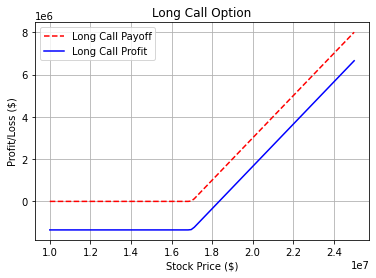

In [ ]:
#  Generate a range of stock prices for plotting.
S = np.linspace(10000000, 25000000, 100)

#  Calculate the call price as a function of S
d1_call, d2_call = d_call()
C = call_price()

Profit_Long_Call = C - Premi_call
#  Plot the payout graph
plt.plot(S, C, '--',label='Long Call Payoff',color='r')
plt.plot(S, Profit_Long_Call, 'k',label='Long Call Profit',color='b')
plt.legend(loc = 'best')
plt.xlabel('Stock Price ($)')
plt.ylabel('Profit/Loss ($)')
plt.title("Long Call Option")
plt.grid(True)

#### Short Call Option

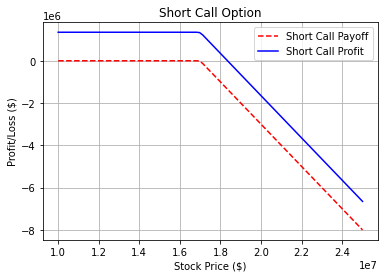

In [ ]:
Profit_Short_Call = -C + Premi_call
#  Plot the payout graph
plt.plot(S, -C, '--',label='Short Call Payoff',color='r')
plt.plot(S, Profit_Short_Call, 'k', label='Short Call Profit',color='b')
plt.legend(loc = 'best')
plt.xlabel('Stock Price ($)')
plt.ylabel('Profit/Loss ($)')
plt.title("Short Call Option")
plt.grid(True)

####  Long Put Option

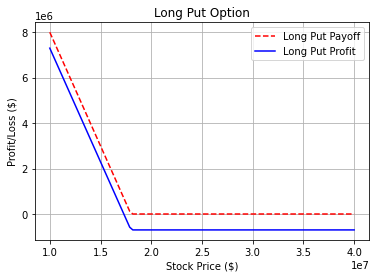

In [ ]:
#  Generate a range of stock prices for plotting.
S = np.linspace(10000000, 40000000, 100)

#  Calculate the put price as a function of S
d1_put, d2_put = d_put()
P = put_price()

Profit_Long_Put = P - Premi_put
#  Plot the payout graph
plt.plot(S, P, '--',label='Long Put Payoff',color='r')
plt.plot(S, Profit_Long_Put, 'k', label='Long Put Profit',color='b')
plt.legend(loc = 'best')
plt.xlabel('Stock Price ($)')
plt.ylabel('Profit/Loss ($)')
plt.title("Long Put Option")
plt.grid(True)

#### Short Put Option

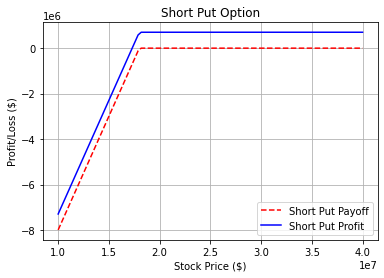

In [ ]:
Profit_Short_Put = - P + Premi_put
#  Plot the payout graph
plt.plot(S, -P, '--',label='Short Put Payoff',color='r')
plt.plot(S, Profit_Short_Put, 'k', label='Short Put Profit',color='b')
plt.legend(loc = 'best')
plt.xlabel('Stock Price ($)')
plt.ylabel('Profit/Loss ($)')
plt.title("Short Put Option")
plt.grid(True)

## Option Strategy

#### Long Strangle

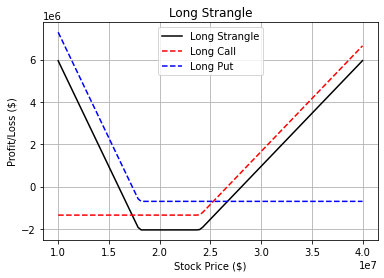

In [ ]:
Profit_Long_Strangle = Profit_Long_Call + Profit_Long_Put
#  Plot the payout graph
plt.plot(S, Profit_Long_Strangle, 'k', label='Long Strangle')
plt.plot(S,Profit_Long_Call,'--',label='Long Call',color='r')
plt.plot(S,Profit_Long_Put,'--',label='Long Put',color='b')
plt.legend(loc = 'best')
plt.xlabel('Stock Price ($)')
plt.ylabel('Profit/Loss ($)')
plt.title("Long Strangle")
plt.grid(True)